In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Support Vector Machines

### The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

![figure1](https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png)
![figure2](https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png)

### To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

## Hyperplanes and Support Vectors

![figure3](https://miro.medium.com/max/1400/1*ZpkLQf2FNfzfH4HXeMw4MQ.png)

### Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

![figure4](https://miro.medium.com/max/700/0*ecA4Ls8kBYSM5nza.jpg)

### Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

In [7]:
# Read data
df = pd.read_csv('rsc/iris.csv')  # dataset can be download from https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset/data
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()

for val in target:
    s.add(val)

s = list(s)
rows = list(range(100,150)) # drop 3rd class data
df = df.drop(df.index[rows])

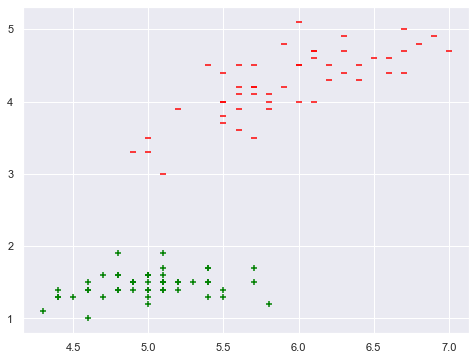

In [8]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [11]:
# there are four features available for us to use. We will be using only two features
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']

for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
        
df = df.drop(['Species'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

In [19]:
## Support Vector Machine 
train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    # print(epochs)
    count = 0

    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1

    epochs += 1

In [17]:
## Clip the weights 
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)

## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []

for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print("Accuray: {}".format(accuracy_score(y_test, predictions)))

1.0


In [18]:
# Using library
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel = 'linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Accuray: {}".format(accuracy_score(y_pred, predictions)))

Accuray: 1.0
/Users/christianlin/miniforge3/envs/apple_tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
